# Project: Investigate a Dataset - Movies DataSet


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#questions1">Exploratory Data Analysis, Questions and Answers</a></li>
<li><a href="#conclusions">Interesting correlation from my first 3 questions</a></li>    
</ul>

Link to DataSet is [here](https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv).


<a id='intro'></a>
## Introduction

In this project we are going to investigate `The Movie Database (TMDb)`. 
This data set contains information about 10,000 movies collected from `The Movie Database (TMDb)`, including user ratings and revenue.
- Certain columns, like `cast` and `genres`, contain multiple values separated by pipe (|) characters.
- There are some odd characters in the `cast` column. Don’t worry about cleaning them. You can leave them as is.
- The final two columns ending with `_adj` show the `budget` and `revenue` of the associated movie in terms of 2010 dollars, accounting for inflation over time.

***What follows now***:
 <ul>
    <li><a href="#firststeps">We will beging with exploring the different columns in the dataset,</a></li>
    <li><a href="#questions">Then pose some questions that we want answers from the dataset,</a></li>
    <li><a href="#wrangling">Some data wrangling, as we would like to clean our data before we start answering our questions,</a></li>
    <li><a href="#question1">Research and answering the questions.</a></li>
    <li><a href="#conclusions">Correlation from answers to the questions.</a></li>
</ul>, 

<a id='firststeps'></a>

### First steps first: 

- ***import libraries required for this dataset***
- ***Load DataSet  - `tmdb-movies.csv`***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('./data/tmdb-movies.csv')

- ***Once gathered data, its time to assess.***

In [2]:
df.head(5)
# Now as I read the values from df, I see the columns that probably are not going to of
# much use for example first two columns like id and imdb_id

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,06/09/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,04/01/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [3]:
# I would like to see what all years of data we have in dataframe
years = sorted(df.release_year.unique())

start_year = years[0]
end_year = years[-1]
total_years = df.release_year.nunique()

print(f'data values collected from year: {start_year}')
print(f'data values collected till year: {end_year}')
print(f'Number of years of values in dataset: {total_years}')


data values collected from year: 1960
data values collected till year: 2015
Number of years of values in dataset: 56


<a id='questions'></a>

## Questions?

<ul>
    <li><a href="#question1">What is the trend of the mean profit made from the all the movies for each year, taking into account the movies that made some profit?</a></li>
    <li><a href="#question2">Has the mean revenue increased over the years for all movies?</a></li>
    <li><a href="#question3">Has the mean budget increased over the years for all movies?</a></li>
    <li><a href="#question4">Has the runtime of the movies increased over the years?</a></li>
    <li><a href="#question5">Most Successful directors based on mean profit from all the movies they made?</a></li>
</ul>


Before we begin to answer above we will see what are the columns required for above questions. <br>
We can safely proceed to the wrangling sections now.


<a id='wrangling'></a>

## Wrangling

<ul>
    <li><a href="#wrangling1">need to clear out some columns that are not going to required for our research,</a></li>
    <li><a href="#wrangling2">need to remove the missing values by removing the row of values,</a></li>
    <li><a href="#wrangling4">need to clean dataframe of any duplicated values.</a></li>
    <li><a href="#wrangling3">need to create a new column named `proft` by calculating the adjusted to inflation `budget` and `revenue`,</a></li>
</ul>



<a id='wrangling1'></a>

## Lets begin:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       


#### There is `10,866 rows` and `21 columns` worth of data in the dataset.
#### It can be seen from `info()` output some of the columns are missing values.

**for example**:

```
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
```

**we can use `isnull().sum()` on above dataframe to count the number of values missing
values for each column**

In [5]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

<a id='wrangling2'></a>
- ***Before we drop the missing values, lets get rid of the unwanted columns.***  <br>
**columns**: 
    ```
    id:           ID, I dont need this to answer any of my questions,
    overview:     Movie description, not useful for my questions,
    tagline:      Movie tagline, I dont need this to answer any of my questions,
    homepage:     Movie homepage, I dont need this to answer any of my questions,
    imdb_id:      IMDB ID for movie, I dont need this to answer any of my questions,
    vote_count:   Number of votes on the IMDB for this movie, not useful for my questions,
    vote_average: Vote average similarly not useful for my set of questions,
    release_date: Most of my questions deals with year, hence release_date is not useful.
```


- ***Remove the columns from dataframe using `drop`***

In [6]:
# columns to be dropped from the dataframe
cols_rid = ['homepage', 'tagline', 'release_date', 'imdb_id', 
            'id', 'overview', 'vote_count', 'vote_average']

# drop the columns and save the dataframe 
df.drop(columns=cols_rid, inplace=True)

# confirm the shape of the dataframe expected 
# number of columns in dataframe should be 15 
# after removing 7 columns.
assert df.shape[1] == 13  # should be True

- ***Drop the rows with missing values using `dropna` method***

In [7]:
# drop the rows with missing values in the dataframe and save the new state
df.dropna(inplace=True)

# validate that there are no missing values 
assert df.isnull().any().any() == False  

<a id='wrangling4'></a>

- **Lets see if there are any duplicate values in the data**

In [8]:
sum(df.duplicated())

1

- **Lets drop the duplicated values, using `inplace` we preserve the state of the Dataframe.**

In [9]:
df.drop_duplicates(inplace=True)

# confirm there are no duplicate values now.
assert df.duplicated().any() == False  

- ***Create a copy of the DF since its has been cleaned for research purpose, we can use the origional `df` later on (if required) for different questions***.

In [10]:
dfrev = df.copy()

<a id='wrangling3'></a>

**In order to do research around `revenue` based on `titles`, `directors`, `years` we need columns `budget_adj` and `revenue_adj` whose values are adjusted with inflation for each row. <br>
In dataset we dont see a column for `profit`, so we create one using the `budget_adj` and `revenue_adj`:** <br>

```
profit = revenue_adj - budget_adj
```

**the values I get above get number, hence I take proportion as the profit**:

```
profit = revenue_adj / budget_adj

if profit > 1:
    then movie was successful and made profit
else:
    then movie could not recover the budget
```

In [11]:
dfrev['profit'] = dfrev['revenue_adj'] / dfrev['budget_adj']
dfrev['profit'].describe()

count    5585.000000
mean             inf
std              NaN
min         0.000000
25%         0.305536
50%         2.041864
75%         6.785319
max              inf
Name: profit, dtype: float64

So in above cell, there is a problem some of the values are `infinite` <br>
we can convert `inf` to `nan` using `replace` method as done [here on stackoverflow.](https://stackoverflow.com/questions/17477979/dropping-infinite-values-from-dataframes-in-pandas)

In [12]:
def get_missing_values(dfx):
    """This method returns the """
    res = f'Number of missing values in profit column: {dfx["profit"].isnull().sum()}'
    return res

print('\nBefore replacing the "inf" with "nan" values,')
print(get_missing_values(dfrev))

# replace the inf's with NaN
dfrev['profit'].replace([np.inf, -np.inf], np.nan, inplace=True)

# now count he number of Nan Values in the profit column
print('\nAfter replacing the "inf" with "nan" values,')
print(get_missing_values(dfrev))

dfrev.dropna(inplace=True)  # lets drop the missing values
print('\nAfter dropping the "inf" with "nan" values,')
print(get_missing_values(dfrev))


Before replacing the "inf" with "nan" values,
Number of missing values in profit column: 3081

After replacing the "inf" with "nan" values,
Number of missing values in profit column: 3940

After dropping the "inf" with "nan" values,
Number of missing values in profit column: 0


In [13]:
# profit columns has values upto 6 decimal values we dont need that precise values.
dfrev['profit'] = dfrev['profit'].round(2)

In [14]:
dfq1 = dfrev.copy() # clean dataframe for research on question 1
dfq2 = dfrev.copy() # clean dataframe for research on question 2
dfq3 = dfrev.copy() # clean dataframe for research on question 3
dfq4 = dfrev.copy() # clean dataframe for research on question 4
dfq5 = dfrev.copy() # clean dataframe for research on question 4

<a id='question1'></a>
## Q1. What is the trend of the profit made from the movie that made some profit?

  - I am interested at looking at the trend of mean profit made by all the successful movies in all the years. 
  - By Successful, I mean taking into the account the movies who have made atleast a dollar in profit.

    **logic for profit and considering a movie a success**:

    ```
      profit = revenue_adj / budget_adj

      if profit > 1:
          then movie was successful and made profit
      else 0 > profit < 1:
          then movie could not recover the budget
    ```

In [15]:
print(f'Shape of dfq1: {dfq1.shape}')

number_of_movies_made_no_money = dfq1.query('profit <= 1')['profit'].shape[0]
print(f'Number of movies did not make profit: {number_of_movies_made_no_money}')

# create a DF with all the rows whose profit proportion is more than 0.
data = dfq1.query('profit > 1')[['release_year', 'profit']]

print(f'Number of movies did not make profit: {data.shape[0]}')

Shape of dfq1: (4726, 14)
Number of movies did not make profit: 2041
Number of movies did not make profit: 2685


- ***Now that we have dataframe `data` lets plot a scatter graph to see the relation between the `release year` and `profit proportion`.***

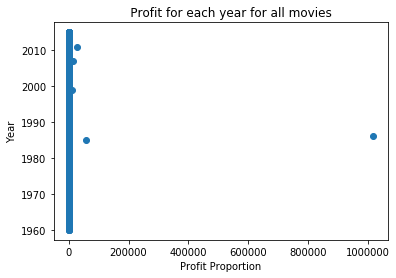

In [16]:
plt.scatter(x=data['profit'], y=data['release_year'])
plt.title("     Profit for each year for all movies")
plt.xlabel("Profit Proportion")
plt.ylabel("Year")
plt.show()

- **We did not get a clean scatter plot because of the Outliers**.
- **Lets clean up the profit proportion column to remove the outliers**
- **Simple way is remove the top 5 largest values in profit columns can be seen from above scatter plot (5 dots)**

In [17]:
# find top five values of the profit column.
data.nlargest(10,['profit'])

,release_year,profit
10495,1986,1018619.28
6179,1985,58771.93
3608,2011,26881.72
7447,2007,12890.39
2449,1999,9920.00
3581,2011,1378.00
1354,1977,700.00
7277,1972,500.00
7178,2004,439.62
242,2015,426.64


In [18]:
# I have created a method to remove the outliers in the profit column
# as I think this method could be useful while finding answer to my
# other 3 questions.

def remove_profit_outliers(df_rpo, number_of_rows: int = 5):
    """
    Method to remove the outliers in the profit column in the DF
    
    param df_rpo: dataframe whose profit outliers to be taken out.
    :type df_rpo: dataframe
    :param number_of_rows: number of outliers to be taken out, by default takes out 5.
    :type number_of_rows: integer
    :return: cleaned dataframe
    """

    # find the index's of the above top 5 largest profit values.
    indexs = df_rpo.nlargest(number_of_rows, ['profit']).index

    # drop these rows of data 
    df_rpo.drop(indexs, axis=0, inplace=True)

    return df_rpo


data = remove_profit_outliers(data)

- **Now we plot again on scatter graph**

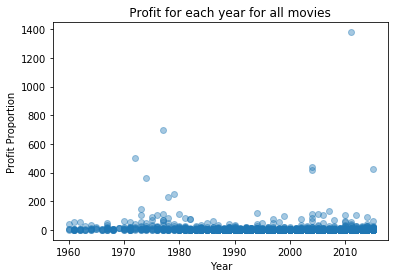

In [19]:
plt.scatter(y=data['profit'], x=data['release_year'], alpha=0.4)
plt.title("     Profit for each year for all movies")
plt.xlabel("Year")
plt.ylabel("Profit Proportion")
plt.show()

- **Good there is some progress, but still not close to what I need answer to the question would be.** 
- **In above graph we are looking at the scatter points, thousands of them that is because we are plotting all the movies profit proportions.**
- **what I need is the mean profit proportion trend for the years, which means we need to find the mean of profit column.**

In [20]:
data = data.groupby('release_year')[['profit', 'release_year']].mean()

- **lets see what our data dataframe looks like**.

In [21]:
# lets round the profit column and tidy it up
data['profit'] = data['profit'].round(1)
data.head(5)

,profit,release_year
release_year,,
1960,13.9,1960
1961,9.9,1961
1962,11.1,1962
1963,8.5,1963
1964,10.2,1964


In [22]:
data.profit.describe()

count    56.000000
mean     12.150000
std      13.773717
min       2.800000
25%       4.950000
50%       7.000000
75%      13.100000
max      77.000000
Name: profit, dtype: float64

- **Lets plot the scatter graph again.**

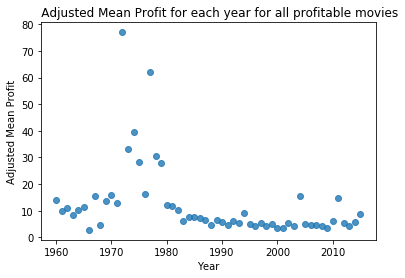

In [23]:
plt.scatter(y=data['profit'], x=data['release_year'], alpha=0.8)
plt.title("      Adjusted Mean Profit for each year for all profitable movies")
plt.xlabel("Year")
plt.ylabel("Adjusted Mean Profit")
plt.show()

- It is quite evident from above scatter plot since mid of 1980's the mean profit of all successful films who made atleast a dollar of profit is less than the mean of all years of mean profit. Lets see the stats via code.

In [24]:

mean_of_all_profits_for_all_years = data.profit.mean()
mean_of_all_profits_for_all_years
print(f'mean of all profit proportions for all the years: {mean_of_all_profits_for_all_years}')

data.query('profit < @mean_of_all_profits_for_all_years')['release_year']

mean of all profit proportions for all the years: 12.150000000000002


release_year
1961    1961
1962    1962
1963    1963
1964    1964
1965    1965
1966    1966
1968    1968
1981    1981
1982    1982
1983    1983
1984    1984
1985    1985
1986    1986
1987    1987
1988    1988
1989    1989
1990    1990
1991    1991
1992    1992
1993    1993
1994    1994
1995    1995
1996    1996
1997    1997
1998    1998
1999    1999
2000    2000
2001    2001
2002    2002
2003    2003
2005    2005
2006    2006
2007    2007
2008    2008
2009    2009
2010    2010
2012    2012
2013    2013
2014    2014
2015    2015
Name: release_year, dtype: int64

- **Lets see how above scatter graph looks on a bar plot**

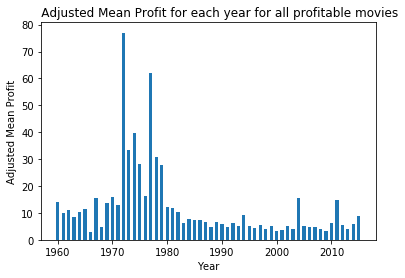

In [25]:
plt.bar(data['release_year'], data['profit'], width=0.6)
plt.title("      Adjusted Mean Profit for each year for all profitable movies")
plt.xlabel("Year")
plt.ylabel("Adjusted Mean Profit")
plt.show()

## From the above two graphs, I see answer to my first question:
 - Distribution in the bar graph is Positively Skewed.
 - Profiteering proportion has decreased over the years for the movies who have made any profit.

<a id='question2'></a>
## Q2. Has the mean revenue increased over the years for all movies?
  - **In this question, I am looking for trend of mean revenue generated over the years for all the movies whether they made profit or not (successful or not)**.
  - **To find the answer to the question we have cleaned DF ready to use `dfq2`**.

In [26]:
dfq2.shape

(4726, 14)

In [27]:
dfq2['profit'].max()

1018619.28

In [28]:
# lets remove the outliers again as we removed earlier, we can use the method we created earlier.
dfq2 = remove_profit_outliers(dfq2)
dfq2.profit.max()

1378.0

In [29]:
dfq2.shape 

(4721, 14)

- **to go through the logic of profit proportion here again**

```
    min() = 1 means movie made no profit, 
    min() > 0  and min() < 1 movie lost money 
    min() > 1 movie made profit
```

In [30]:
dfq2.profit.min() 

0.0

In [31]:
# for each year, lets see what is the mean revenue, runtime, adjusted budget and revenue.
data = dfq2.groupby('release_year')[['runtime', 'revenue', 'budget_adj', 'revenue_adj','release_year']].mean()

data.sort_values(by='revenue_adj', ascending=False, inplace=True)
data.rename(columns={'release_year': 'year_of_release'}, inplace=True)
data.shape

(56, 5)

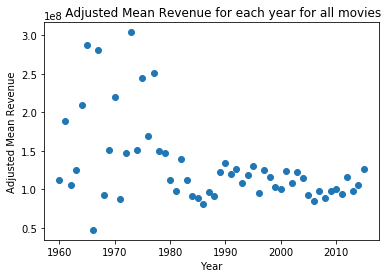

In [32]:
# scatter plot to see what is the adjusted mean budget for all movies looks like for each year
plt.scatter(y=data['revenue_adj'], x=data['year_of_release'])
plt.title("      Adjusted Mean Revenue for each year for all movies")
plt.xlabel("Year")
plt.ylabel("Adjusted Mean Revenue")
plt.show()

## From the above graph, I see answer to my second question:
 - Distribution in the bar graph is Positively Skewed.
 - Profiteering proportion has decreased over the years for the movies who have made any profit.

<a id='question3'></a>

## Q3 Has the mean budget increased over the years for all movies?

- **We can use the same `data` dataframe descending from `q2`**

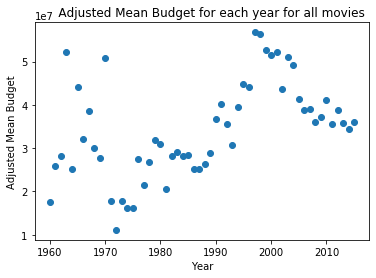

In [33]:
# since we have the data dataframe ready with all the mean values to the columns like
# revenue, runtime, adjusted budget and revenue for each year, we can use the same 
# dataframe to find an answer to this question.

# lets plot a scatter graph the mean adjusted budget allocation to all the movies for each year.
plt.scatter(y=data['budget_adj'], x=data['year_of_release'])
plt.title("     Adjusted Mean Budget for each year for all movies")
plt.xlabel("Year")
plt.ylabel("Adjusted Mean Budget")
plt.show()

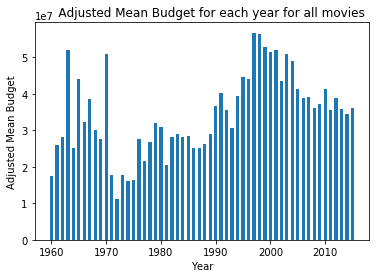

In [34]:
# want to see what above looks like in bar graph

# need to round off the mean of adjusted budget for each year as the bar graph.
data['budget_adj'] = data['budget_adj'].round().astype(np.int)
data['year_of_release'] = data['year_of_release'].round().astype(np.int)

# lets plot a bar graph the mean adjusted budget allocation to all the movies for each year.
plt.bar(data['year_of_release'], data['budget_adj'], width=0.6)
plt.title("     Adjusted Mean Budget for each year for all movies")
plt.xlabel("Year")
plt.ylabel("Adjusted Mean Budget")
plt.show()

## From the above graph, I see answer to my third question:
 - Distribution in the scatter graph is  Positive Correlation.
 - Mean Budget_adj allocation of the movies is increasing over the years.
 - Since 1990's all the bar heights are above median of budget_adj.


<a id='question4'></a>

## Q4. Has the runtime of the movies increased over the years?
- **We can use the same `data` dataframe descending from `q2`**

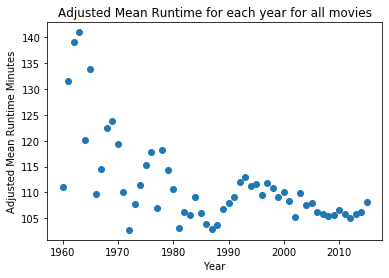

In [35]:
plt.scatter(y=data['runtime'], x=data['year_of_release'])
plt.title("Adjusted Mean Runtime for each year for all movies")
plt.xlabel("Year")
plt.ylabel("Adjusted Mean Runtime Minutes")
plt.show()

## From the above graph, I see answer to my fourth question:
 - Distribution in the bar graph is strong Negative Correlation.
 - Mean runtime of the movies has reduce of the years.


<a id='question5'></a>
## Q5. Most Successful directors based on profit that movie made?

In [36]:
# dfq5.sort_values(by='profit', inplace=True, ascending=False)
dfq5 = dfq5.groupby('director')[['director', 'profit']].mean()
dfq5.sort_values(by='profit', inplace=True, ascending=False)
dfq5.head(20)

,profit
director,
John G. Avildsen,169790.598333
Angel Gracia,26881.720000
Daniel Myrick|Eduardo SÃ¡nchez,9920.000000
Oren Peli,6445.195000
John Landis,4903.769167
Dermot Mulroney,1378.000000
Travis Cluff|Chris Lofing,426.640000
Chris Kentis,420.520000
Morgan Spurlock,219.810000


In [37]:
# remove the top 10 outliers
dfq5 = remove_profit_outliers(dfq5, 10)

In [38]:
sub_dfq5 = dfq5.nlargest(5,['profit'])

- **[Pie Chart inspired from matplotlib.org](https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py)** <br>

- **So we have dataframe with two columns `director` and `profit`, `profit` has the mean profit of all the movies by the director.**

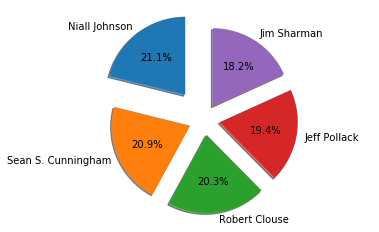

In [39]:
list_of_top_directors = sub_dfq5.index.to_list()  # get list of the top director
list_of_top_profits = sub_dfq5.profit.astype(np.int).to_list() # get list of the profits made
 
explode = (0.4, 0.2, 0.2, 0.2, 0.2) # how far in the pie chart the slices will be from each other

fig1, ax1 = plt.subplots()
ax1.pie(list_of_top_profits, explode=explode, labels=list_of_top_directors, 
        autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## From the above graph, I see answer to my fifth question:
 - `Niall Johnson` movies has made the most profit 


<a id='conclusions'></a>

## Conclusions

 - **Conclusions for the questions can be found at the end of the question and its research/graphs.** <br>
 - **Interesting theory that correlates with my answers to `question 1, question 2 and question 3`.**  <br> 
 - **From the answer to the `question 1` we saw that the profiteering proportion has decreased over the years.** <br> 
 - **I wonder why, could it to be due to the overall expenses for making a movie has increased over the years?** <br>
 - **We find answer to our puzzle from answer to our `questions 2` and `question 3`** <br>
 - **Answer to question 2 tells us the profit proportion for all the movies have decreased and answer to `question 3` tells there is an increase in the `budget` from `1960's` to `2015`**.

